# Final Project: Data Ethics and Policy

Christy Hsu (Georgetown University)

## Abstract

This project looked into an attempt in the fifties that set out to measure individual tolerance and use that measure to evaluate the impact the anti-Communism Cold War agenda—both abroad and at home—had on U.S. citizens. I saw the picking up of this 70-year-old survey data, and the analysis that accompanied it, as a chance to stroll through the data ethics concerns that can arise when holding the hope to learn about the world from data

## Introduction

The online poll data library host by Roper Center was where I first came across the Stouffer Study of 1954 *Communism, Conformity, and Civil Liberties: A Cross-Section of the Nation Speaks Its Mind* by Samuel Andrew Stouffer([Fund For The Republic and Stouffer 2020](#ref-fundfortherepublicCommunismConformityAmp2020))And, I gain access to the entire dataset on ICPSR([Samuel A. Stouffer 1992](#ref-stoufferCommunismConformityCivil1992))

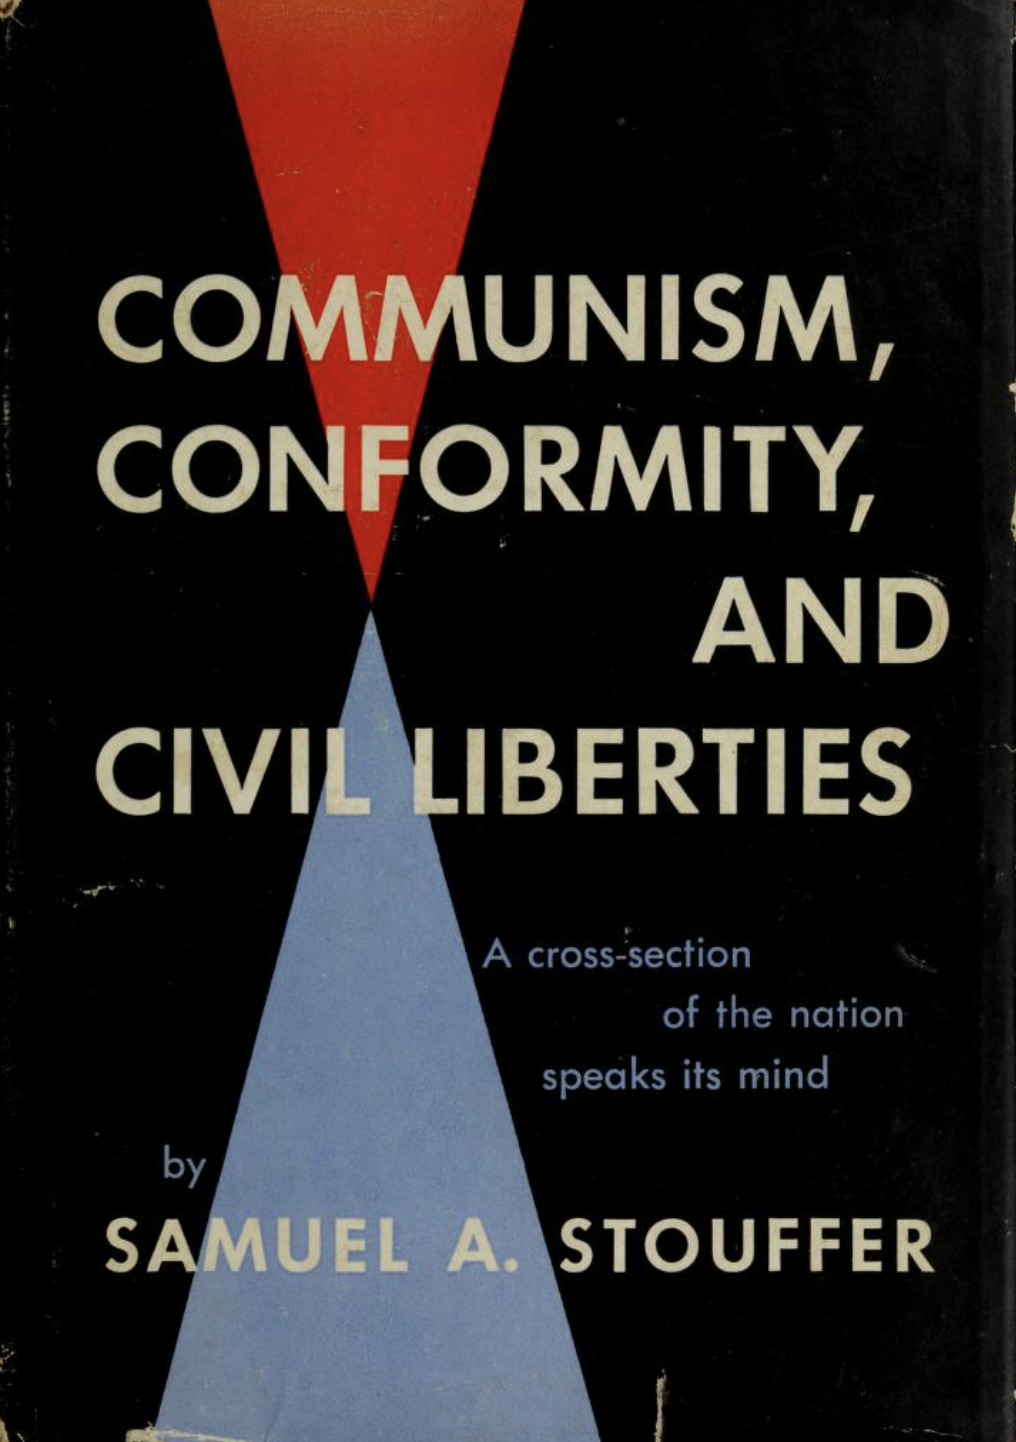

I found Stouffer’s attempt in the fifties to design public opion polls and, construct an innovative way of measuring the latent properties tolerance and fear in at the individual level very interesting. The tolerance scale and the perception of internal communist danger scale are not included in the data, thus a major part of this project involved returning these two target variables in order to complete the picture and reproduce that basis on which Stouffer’s was primary based. I learned much from this practice of reading and researching that past effort into conceptualizing and ooperationalizing tolerance and fear, and got my hands dirty to really apply those framing and method to the data. It gave me a chance to reflect on the many artistic and arbitrary decisions that the researcher made throughout this data analysis process.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Le chargement a nécessité le package : Matrix

Attachement du package : 'Matrix'

Les objets suivants sont masqués depuis 'package:tidyr':

    expand, pack, unpack

Loaded glmnet 4.1-8

Le chargement a nécessité le package : lattice

Attachement du package : 'caret'

L'objet suivant est masqué depuis 'package:purrr':

    lift

## Harvest from Historical Data collection efforts: a more friendly format

In terms of not violate the redistribution policy of ICPSR, here won’t be providing the converted files, rather STATA .do and .dct files constructed by the author (derived from the codebook)

│   ├── read-ascii-files │   │   ├── gp-decode.do │   │   ├── lead-decode.do │   │   ├── sample1.dct │   │   └── sample2.dct

## Returning target variables to the data

The tolerance that Stouffer argued upon.([Samuel Andrew Stouffer 1955](#ref-stouffer1955communism))

#### Preparing the `code_df` data frame

1.  Cleaning column names and binding the two samples

In [ ]:
# read the coded csv files for both samples
public_df <- read_csv('data/converted/coded-public.csv')

Rows: 4933 Columns: 152
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (152): v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 1500 Columns: 151
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (151): v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
# for the variables from 150 on distinguish those from public sample and those from leader sample since they represent different survey questions

public_df <- public_df |>
  rename(
    public_v150 = v150,
    public_v151 = v151,
    public_v152 = v152
  )
lead_df <- lead_df |>
  rename(
    lead_v150 = v150,
    lead_v151 = v151
  )

# sample specific questions to the other sample, I filled the empty entries with 54
lead_df <- lead_df |>
  mutate(public_v150 = 54, public_v151 = 54, public_v152 = 54)
public_df <- public_df |>
  mutate(lead_v150 = 54, lead_v151 = 54)

1.  Adding Binary and Ternary Variables `leader`,`interested` and `categorizer`: these are the variables that Stouffer specified in his book as ways to divide the respondents and make comparisons.

In [ ]:
code_df <- bind_rows(public_df, lead_df)
code_df <- code_df |> mutate(leader = case_when(
  lead_v150 == 54 ~ 0,
  TRUE ~ 1
))
code_df |> count(leader)

In [ ]:
code_df <- code_df |> mutate(interested = case_when(
    v123 == 1 ~ 'more',
    v123 == 2 ~ 'more',
    TRUE ~ 'less'
)
)
code_df |> count(leader, interested) |> group_by(leader) |> mutate(pct = n / sum(n) * 100) |> ungroup()

In [ ]:
code_df <- code_df |> mutate(categorizer = case_when(
  v127 %in% c(1, 2) ~ 'agree',
  v127 == 8 ~'dont know',
  TRUE ~ 'disagree'
))

In [ ]:
code_df |> count(leader, categorizer)|> group_by(leader) |> mutate(pct = n / sum(n) * 100) |> ungroup()

## Scale1: Willingness to Tolerate Nonconformist

#### Conceptual Tolerance and Operational Tolerance

The questionnaires used to rank respondents into six tolerance groups focused on four types of nonconformists:

-   A person who is against all churches and religion (atheist)
-   A person who favors government ownership (socialist)
-   An alleged communist (someone whose loyalty has been questioned by a Congressional Committee but swears under oath they have never been a communist)
-   An admitted communist

respondent were asked about their approval of 3 types of disposition against the above nonconfromist, and whether they agree or disagree the limitation or deprivation of the nonconformist’s civil liberties, for example:

1.  Freedom speech:

    -   “If \_\_\_ wants to make a speech in your community, should he be allowed to speak or not?”

2.  Book censor:

    -   “Suppose he wrote a book that is in your public library. Somebody in your community suggests the book should be removed. Would you favor removing it, or not?”

3.  Employment:

    -   Should a radio singer who is a nonconformist be fired or not?
    -   Should a college or university teacher be fired or not?
    -   Should a high school teacher be fired or not?
    -   Should someone working in a defense plant be fired or not?
    -   Should a store clerk be fired or not?

4.  Boycott:

    -   “Suppose the radio program he is on advertises a brand of soap. Somebody in your community suggests you stop buying that soap. Would you stop or not?”

#### 0 to 5: Scaling Individual Tolerance

I ran into many challenges replicating Stouffer’s results. Both the overall proportions across tolerance rankings, was unable to reproduce the group counts applying further breakdowns, such as by age, region, education, thus for comparison.

In [ ]:
code_df <- code_df |> mutate(tolerance_group = NA_character_)
tolernace_items <- c(
  'v100', 'v101', 'v102',
  'v104', 'v32', 'v34',
  'v103', 'v35', 'v37',
  'v108', 'v109', 'v113',
  'v106', 'v107', 'v110'
)

In [ ]:
# df0 <- code_df |> filter(
#   ((v100 == 1) + (v101 == 5) + (v102 == 5) < 2) &
#   ((v104 == 5) + (v32 == 1) + (v34 == 5) < 2) &
#   ((v103 == 5) + (v35 == 1) + (v37 == 5) < 2) &
#   ((v108 == 5) + (v109 == 1) + (v113 == 5) < 2) &
#   ((v106 == 5) + (v107 == 5) + (v110 == 5) + (v106 == 8) + (v107 == 8) + (v110 == 8) < 2)) |> dplyr::select(
#     all_of(tolernace_items))
# df0 |> View()

In [ ]:
## sanity check
df5 <- code_df |> filter(
  ((v100 == 1) + (v101 == 5) + (v102 == 5) >= 2) &
  ((v104 == 5) + (v32 == 1) + (v34 == 5) >= 2) &
  ((v103 == 5) + (v35 == 1) + (v37 == 5) >= 2) &
  ((v108 == 5) + (v109 == 1) + (v113 == 5) >= 2) &
  ((v106 == 5) + (v107 == 5) + (v110 == 5) + (v106 == 8) + (v107 == 8) + (v110 == 8) >= 2)) |> dplyr::select(
    all_of(tolernace_items))
# df5
df3 <- code_df |> filter(!((v104 == 5) + (v32 == 1) + (v34 == 5) >= 2)) |> filter(
  ((v103 == 5) + (v35 == 1) + (v37 == 5) >= 2) &
  ((v108 == 5) + (v109 == 1) + (v113 == 5) >= 2) &
  ((v106 == 5) + (v107 == 5) + (v110 == 5) + (v106 == 8) + (v107 == 8) + (v110 == 8) >= 2)) |> dplyr::select(
    all_of(tolernace_items))
# df3 |> View()

In [ ]:
code_df <- code_df |> mutate(tolerance_group = NA_character_)

condition_filter <- function(df, condition, group_name){
  df <- df |> mutate(
    tolerance_group = case_when(
      is.na(tolerance_group) & !!rlang::enquo(condition) ~ group_name,
      TRUE ~ tolerance_group
    )
  )
  return(df)
}

In [ ]:
code_df <- code_df |> condition_filter(
  ((v100 == 1) + (v101 == 5) + (v102 == 5) >= 2) & 
  ((v104 == 5) + (v32 == 1) + (v34 == 5) >= 2) & 
  ((v103 == 5) + (v35 == 1) + (v37 == 5) >= 2) &
  ((v108 == 5) + (v109 == 1) + (v113 == 5) >= 2) &
  ((v106 == 5) + (v107 == 5) + (v110 == 5) + (v106 == 8) + (v107 == 8) + (v110 == 8) >= 2),
  "tolerance5"
)
code_df <- code_df |> condition_filter(
  ((v104 == 5) + (v32 == 1) + (v34 == 5) >= 2) & 
  ((v103 == 5) + (v35 == 1) + (v37 == 5) >= 2) &
  ((v108 == 5) + (v109 == 1) + (v113 == 5) >= 2) &
  ((v106 == 5) + (v107 == 5) + (v110 == 5) + (v106 == 8) + (v107 == 8) + (v110 == 8) >= 2),
  "tolerance4"
)
code_df <- code_df |> condition_filter(
  ((v103 == 5) + (v35 == 1) + (v37 == 5) >= 2) &
  ((v108 == 5) + (v109 == 1) + (v113 == 5) >= 2) &
  ((v106 == 5) + (v107 == 5) + (v110 == 5) + (v106 == 8) + (v107 == 8) + (v110 == 8) >= 2),
  "tolerance3"
)
code_df <- code_df |> condition_filter(
  ((v108 == 5) + (v109 == 1) + (v113 == 5) >= 2) &
  ((v106 == 5) + (v107 == 5) + (v110 == 5) + (v106 == 8) + (v107 == 8) + (v110 == 8) >= 2),
  "tolerance2"
)
code_df <- code_df |> condition_filter(
  ((v106 == 5) + (v107 == 5) + (v110 == 5) + (v106 == 8) + (v107 == 8) + (v110 == 8) >= 2),
  "tolerance1"
)
code_df <- code_df |> mutate(
  tolerance_group = ifelse(
    is.na(tolerance_group), "tolerance0", tolerance_group
    )
  )

In [ ]:
code_df |> count(leader, tolerance_group) |> group_by(leader) |> mutate(pct = n / sum(n) * 100) |> ungroup()

In [ ]:
code_df |> count(tolerance_group)

#### Broader Tolerance Rank Groups: `less tolerant`, `in-between` and `more tolerant`

In [ ]:
code_df <- code_df |> 
  mutate(tolerance_broader0 = case_when(
    tolerance_group %in% c('tolerance0', 'tolerance1') ~ 'less tolerant',
    tolerance_group %in% c('tolerance2', 'tolerance3') ~ 'in between',
    TRUE ~ 'more tolerant'
  )) |>
  mutate(tolerance_broader0 = factor(
    tolerance_broader0,levels = c('more tolerant', 'in between', 'less tolerant'), ordered = TRUE
    ))

In [ ]:
code_df |> filter(leader == 1) |> count(tolerance_broader0) |> mutate(pct = (n / sum(n)) * 100)

#### Attempt2

Allowing some inconsistency?

In [ ]:
library(rlang)


Attachement du package : 'rlang'

Les objets suivants sont masqués depuis 'package:purrr':

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice

In [ ]:
code_df <- assign_tolerance(code_df)
code_df |> count(tolerance)

In [ ]:
code_df |> count(leader, tolerance) |> group_by(leader) |> mutate(pct = n / sum(n) * 100) |> ungroup()

In [ ]:
code_df <- code_df |> 
  mutate(tolerance_broader = case_when(
    tolerance %in% c('tolerance0', 'tolerance1') ~ 'less tolerant',
    tolerance %in% c('tolerance2', 'tolerance3') ~ 'in between',
    TRUE ~ 'more tolerant'
  )) |>
  mutate(tolerance_broader = factor(
    tolerance_broader,levels = c('more tolerant', 'in between', 'less tolerant'), ordered = TRUE
    ))

In [ ]:
code_df |> count(leader, tolerance_broader) |> group_by(leader) |> mutate(pct = n / sum(n) * 100) |> ungroup()

To answer this question([Samuel Andrew Stouffer 1955, 51](#ref-stouffer1955communism))

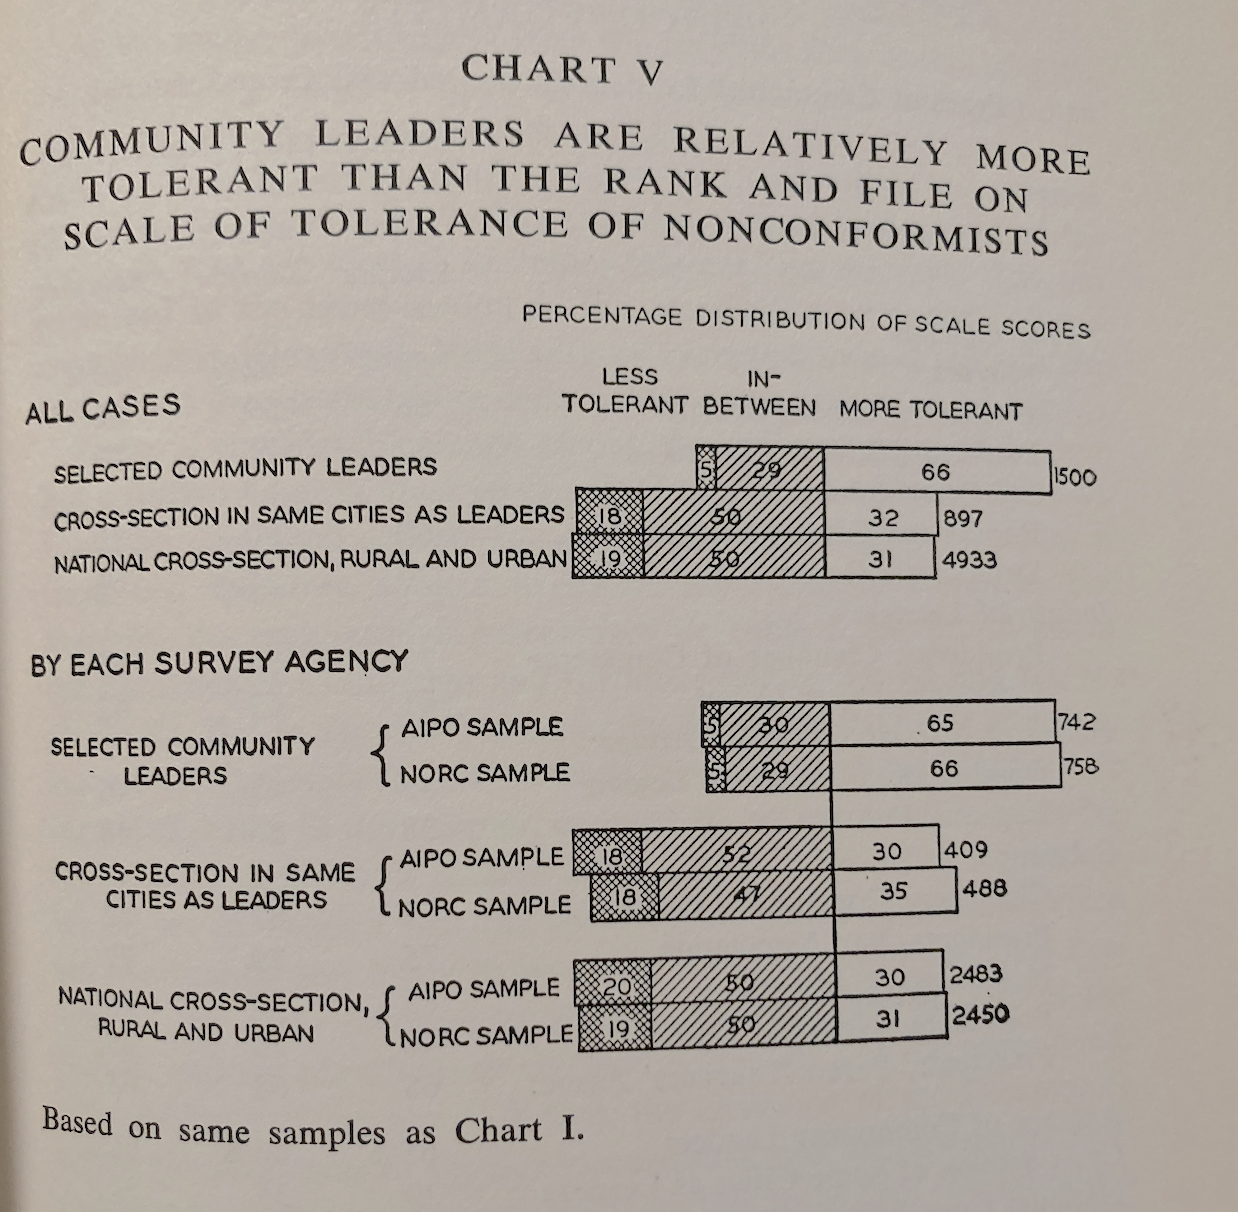

##### us region

In [ ]:
code_df <- code_df |> mutate(us_region = case_when(
  v5 %in% c(0, 1) ~ 'east',
  v5 %in% c(2, 3) ~ 'midwest',
  v5 == 4 ~ 'south',
  TRUE ~ 'west'
)
)

In [ ]:
code_df |> filter(leader == 1) |> count(us_region, tolerance_broader) |> group_by(us_region) |> mutate(pct = n / sum(n) * 100) |> ungroup()

## Scale2: Scale of the Perception on the Internal Communist Danger

In [ ]:
code_df <- code_df |> mutate(danger = NA_character_)

In [ ]:
code_df <- code_df |> 
  mutate(
    danger5_plus = (v75 == 1),
    danger4_plus = (v66 == 1),
    danger3_plus = (v42 %in% c(1, 2)),
    danger2_plus = (v71 == 8 | v72 %in% c(1, 2, 8)),
    danger1_plus = (v68 == 8 | v69 %in% c(1, 2, 8))
  )
code_df <- code_df |> mutate(
  danger = case_when(
    danger5_plus & (danger4_plus + danger3_plus + danger2_plus + danger1_plus >= 4) ~ "danger5",
    danger4_plus & (danger3_plus + danger2_plus + danger1_plus >= 2) ~ "danger4",
    danger3_plus & (danger2_plus + danger1_plus >= 1) ~ "danger3",
    danger2_plus ~ "danger2",
    (danger5_plus + danger4_plus + danger3_plus + danger2_plus + danger1_plus == 0) ~ "danger0",
    TRUE ~ "danger1"
  )
)

In [ ]:
code_df |> count(danger, .drop = FALSE)

### Broader rank groups

In [ ]:
code_df <- code_df |> mutate(danger_broader = case_when(
  danger %in% c('danger5', 'danger4') ~ 'great threat',
  danger %in% c('danger3', 'danger2') ~ 'in between',
  TRUE ~ 'little threat'
))

In [ ]:
code_df |> count(danger_broader)

In [ ]:
cols_drop <- c("danger5_plus", "danger4_plus", "danger3_plus", "danger2_plus", "danger1_plus")
code_df <- code_df |> dplyr::select(-all_of(cols_drop))

### Data and Measures: Validility

From the conceptual variable Tolerance to the operationalized definition of tolerance, that maps answers of the respondent to tolerance group that correspond to their degree of tolerance. But is this tolerance scale really measuring people’s tolerance or is it measuring something else.([Tessler 2022, 43–47](#ref-tesslerSocialScienceResearch2022))

## Evaluating Operationallizations: Reliability and Validity, insights from classfication algorithms

In [ ]:
df_combined <- read_csv('data/df-combined.csv')

Rows: 6433 Columns: 164
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (9): interested, categorizer, tolerance_group, tolerance_broader0, tol...
dbl (155): study_identification, interview_number, type_interview, sample_nu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

### 3-class classification using the strict measure of tolerance score `tolerance_broader0`

In [ ]:
# df_combined |> colnames() |> View()

In [ ]:
tolerance_df0 <- df_combined |> dplyr::select(-all_of(c("study_identification", "interview_number", "type_interview", 
"sample_number","interested", "categorizer",
"tolerance_group", "tolerance_broader", "tolerance", "danger", "danger_broader")))

In [ ]:
tolerance_df0 |> filter(leader == 1) |> count(tolerance_broader0)

In [ ]:
tolerance_df0$tolerance_broader0 <- factor(tolerance_df0$tolerance_broader0, levels = c("more tolerant","in between", "less tolerant"))

In [ ]:
tolerance_df0 <- tolerance_df0 |>
  mutate(across(-tolerance_broader0, ~ as.factor(.)))

In [ ]:
set.seed(5450)
train_indices <- sample(6433, size = 5146)

trainset <- tolerance_df0 |> slice(train_indices)
testset  <- tolerance_df0 |> slice(-train_indices)

In [ ]:
x_train <- model.matrix(tolerance_broader0~ . - 1, data = trainset)
y_train <- trainset$tolerance_broader0

x_test  <- model.matrix(tolerance_broader0~ . - 1, data = testset)
y_test  <- testset$tolerance_broader0

### 3-class classification

``` r
clf0 <- cv.glmnet(
  x_train, y_train, family = "multinomial",
  alpha = 1, type.multinomial = "ungrouped", nfolds = 5
)
```

``` r
lambda_1se0 <- clf0$lambda.1se
lambda_1se0

plot(clf0)
```

``` r
yp_train <- predict(clf0, newx = x_train, s = lambda_1se0, type = 'class')
train_acc <- mean(yp_train == y_train)
train_acc
```

``` r
yp_test <- predict(clf0, newx = x_test, s = lambda_1se0, type = 'class')
test_acc <- mean(yp_test == y_test)
test_acc
```

``` r
yp_test <- factor(yp_test, levels = c("more tolerant","in between", "less tolerant"))
y_test  <- factor(y_test, levels = c("more tolerant","in between", "less tolerant"))
lr_cm0 <- confusionMatrix(yp_test, y_test)
lr_cm0
```

``` r
coef_list <- coef(clf0, s = lambda_1se0)
```

``` r
coefs_df <- map_dfr(names(coef_list), function(class_name) {
  coefs <- coef_list[[class_name]]
  tibble(
    predictor = rownames(coefs),
    coefficient = as.numeric(coefs)
  ) |>
    filter(coefficient != 0) |> 
    arrange(desc(abs(coefficient))) |>
    mutate(
      tolerance_broader0 = class_name,
      rank = row_number()
    ) |>
    dplyr::select(tolerance_broader0, predictor, coefficient, rank)
})
# coefs_df |> write_csv("data/lr-coefs-1se0.csv")
```

``` r
test_result <- tibble(
  true_class0 = y_test,
  pred_class0 = yp_test
)
```

``` r
tolerance_df0
```

### 3-class classification: `tolerance_broader` based on the measure with wiggle room

``` r
tolerance_df <- df_combined |> dplyr::select(-all_of(c("study_identification", "interview_number", "type_interview", 
"sample_number","interested", "categorizer",
"tolerance_group", "tolerance_broader0", "tolerance", "danger", "danger_broader")))
```

``` r
tolerance_df$tolerance_broader <- factor(tolerance_df$tolerance_broader, levels = c("more tolerant","in between", "less tolerant"))
```

``` r
tolerance_df <- tolerance_df |>
  mutate(across(-tolerance_broader, ~ as.factor(.)))
```

``` r
set.seed(545)
train_indices <- sample(6433, size = 5146)

trainset <- tolerance_df |> slice(train_indices)
testset  <- tolerance_df |> slice(-train_indices)
```

``` r
x_train <- model.matrix(tolerance_broader~ . - 1, data = trainset)
y_train <- trainset$tolerance_broader

x_test  <- model.matrix(tolerance_broader~ . - 1, data = testset)
y_test  <- testset$tolerance_broader
```

``` r
clf <- cv.glmnet(
  x_train, y_train,family = "multinomial",
  alpha = 1, type.multinomial = "ungrouped", nfolds = 5
)
```

``` r
lambda_1se <- clf$lambda.1se
```

``` r
plot(clf)
```

``` r
yp_train <- predict(clf, newx = x_train, s = lambda_1se, type = 'class')
train_acc <- mean(yp_train == y_train)
train_acc
```

``` r
yp_test <- predict(clf, newx = x_test, s = lambda_1se, type = 'class')
test_acc <- mean(yp_test == y_test)
test_acc
```

``` r
yp_test <- factor(yp_test, levels = c("more tolerant","in between", "less tolerant"))
y_test  <- factor(y_test, levels = c("more tolerant","in between", "less tolerant"))
lr_cm <- confusionMatrix(yp_test, y_test)
lr_cm
```

``` r
coef_list <- coef(clf, s = lambda_1se)
```

``` r
coefs_df <- map_dfr(names(coef_list), function(class_name) {
  coefs <- coef_list[[class_name]]
  tibble(
    predictor = rownames(coefs),
    coefficient = as.numeric(coefs)
  ) |>
    filter(coefficient != 0) |>
    arrange(desc(abs(coefficient))) |>
    mutate(
      tolerance_broader = class_name,
      rank = row_number()
    ) |>
    dplyr::select(tolerance_broader, predictor, coefficient, rank)
})

# coefs_df |> write_csv("lr-coefs-1se.csv")
```

In [ ]:
# tolernace_items |> View()

### Are these selected Items capturing most of the variances?

``` r
label_lookup <- read_csv('data/gbv_labels.csv')
```

``` r
tolerance_item_labels <- label_lookup |> filter(v_name %in% tolernace_items) |> pull(v_label)
```

In [ ]:
# tolerance_item_labels |> View()

### Truly Learning: dropping the 15 items that contribute to the tolerance scaling

``` r
tolerance_df3 <- df_combined |> dplyr::select(-all_of(c("study_identification", "interview_number", "type_interview", 
"sample_number","interested", "categorizer",
"tolerance_group", "tolerance_broader", "tolerance", "danger", "danger_broader")))
tolerance_df3 <- tolerance_df3 |> dplyr::select(-all_of(tolerance_item_labels))
```

``` r
tolerance_df3 |> filter(leader == 1) |> count(tolerance_broader0)
```

``` r
tolerance_df3$tolerance_broader0 <- factor(tolerance_df3$tolerance_broader0, levels = c("more tolerant","in between", "less tolerant"))
```

``` r
tolerance_df3 <- tolerance_df3 |>
  mutate(across(-tolerance_broader0, ~ as.factor(.)))
```

``` r
set.seed(5450)
train_indices <- sample(6433, size = 5146)

trainset <- tolerance_df3 |> slice(train_indices)
testset  <- tolerance_df3 |> slice(-train_indices)
```

``` r
x_train <- model.matrix(tolerance_broader0~ . - 1, data = trainset)
y_train <- trainset$tolerance_broader0

x_test  <- model.matrix(tolerance_broader0~ . - 1, data = testset)
y_test  <- testset$tolerance_broader0
```

``` r
clf3 <- cv.glmnet(
  x_train, y_train, family = "multinomial",
  alpha = 0.7, type.multinomial = "ungrouped",nfolds = 5
)
```

``` r
lambda_1se3 <- clf3$lambda.1se
lambda_1se3
```

``` r
plot(clf3)
```

``` r
yp_train <- predict(clf3, newx = x_train, s = lambda_1se3, type = 'class')
train_acc <- mean(yp_train == y_train)
train_acc
```

``` r
yp_test <- predict(clf3, newx = x_test, s = lambda_1se3, type = 'class')
test_acc <- mean(yp_test == y_test)
test_acc
```

``` r
yp_test <- factor(yp_test, levels = c("more tolerant","in between", "less tolerant"))
y_test  <- factor(y_test, levels = c("more tolerant","in between", "less tolerant"))
lr_cm0 <- confusionMatrix(yp_test, y_test)
lr_cm0
```

### Acquired the class specific variables and their coefficients

``` r
coef_list <- coef(clf3, s = lambda_1se3)
```

``` r
coefs_df <- map_dfr(names(coef_list), function(class_name) {
  coefs <- coef_list[[class_name]]
  tibble(
    predictor = rownames(coefs),
    coefficient = as.numeric(coefs)
  ) |>
    filter(coefficient != 0) |> 
    arrange(desc(abs(coefficient))) |>
    mutate(
      tolerance_broader0 = class_name,
      rank = row_number()
    ) |>
    dplyr::select(tolerance_broader0, predictor, coefficient, rank)
})
# coefs_df |> write_csv("data/lr-coefs-1se3-elastic.csv")
```

``` r
coefs_df |> count(predictor)
```

In [ ]:
toler_rigid_tb <- table(df_combined$tolerance_group, df_combined$categorizer)
chi_test <- chisq.test(toler_rigid_tb)
chi_test


    Pearson's Chi-squared test

data:  toler_rigid_tb
X-squared = 491.09, df = 10, p-value < 2.2e-16

In [ ]:
chi_test$residuals

            
                  agree   disagree  dont know
  tolerance0  3.6776281 -5.3964437  1.1128421
  tolerance1 -2.3955483 -1.0211719 10.7874512
  tolerance2  4.5040579 -6.1915000  0.3030713
  tolerance3  2.7420911 -2.5744267 -2.8481376
  tolerance4 -0.6175252  2.2641002 -3.6331099
  tolerance5 -7.2561266 11.9240239 -5.4354457

In [ ]:
toler_danger_tb <- table(df_combined$tolerance_group, df_combined$danger)
chi_test <- chisq.test(toler_danger_tb)
chi_test


    Pearson's Chi-squared test

data:  toler_danger_tb
X-squared = 410.67, df = 25, p-value < 2.2e-16

In [ ]:
chi_test$residuals

            
                  danger0      danger1      danger2      danger3      danger4
  tolerance0 -2.970715176 -2.658964979 -2.459910036  0.974739884  2.152232514
  tolerance1 -4.609232171 -1.006527133  4.547776892 -1.482352369  0.006717332
  tolerance2 -3.631408736 -5.657972356  0.475321324  2.009535358  1.330107400
  tolerance3 -0.858497500 -0.790142288 -1.598983893  2.256620306  1.165660786
  tolerance4  0.394465523  0.926642029 -0.167803951  0.370962087 -0.093407449
  tolerance5 10.328080755  8.630383914 -1.058231155 -3.774441827 -3.913075010
            
                  danger5
  tolerance0  4.929822736
  tolerance1 -0.973974888
  tolerance2  3.228408105
  tolerance3 -0.075048875
  tolerance4 -1.188784303
  tolerance5 -5.126832308

In [ ]:
residuals_df <- as_tibble(as.table(chi_test$residuals), .name_repair = 'minimal') |>
  rename(
    tolerance = 1,
    danger = 2,
    residual = n
  )

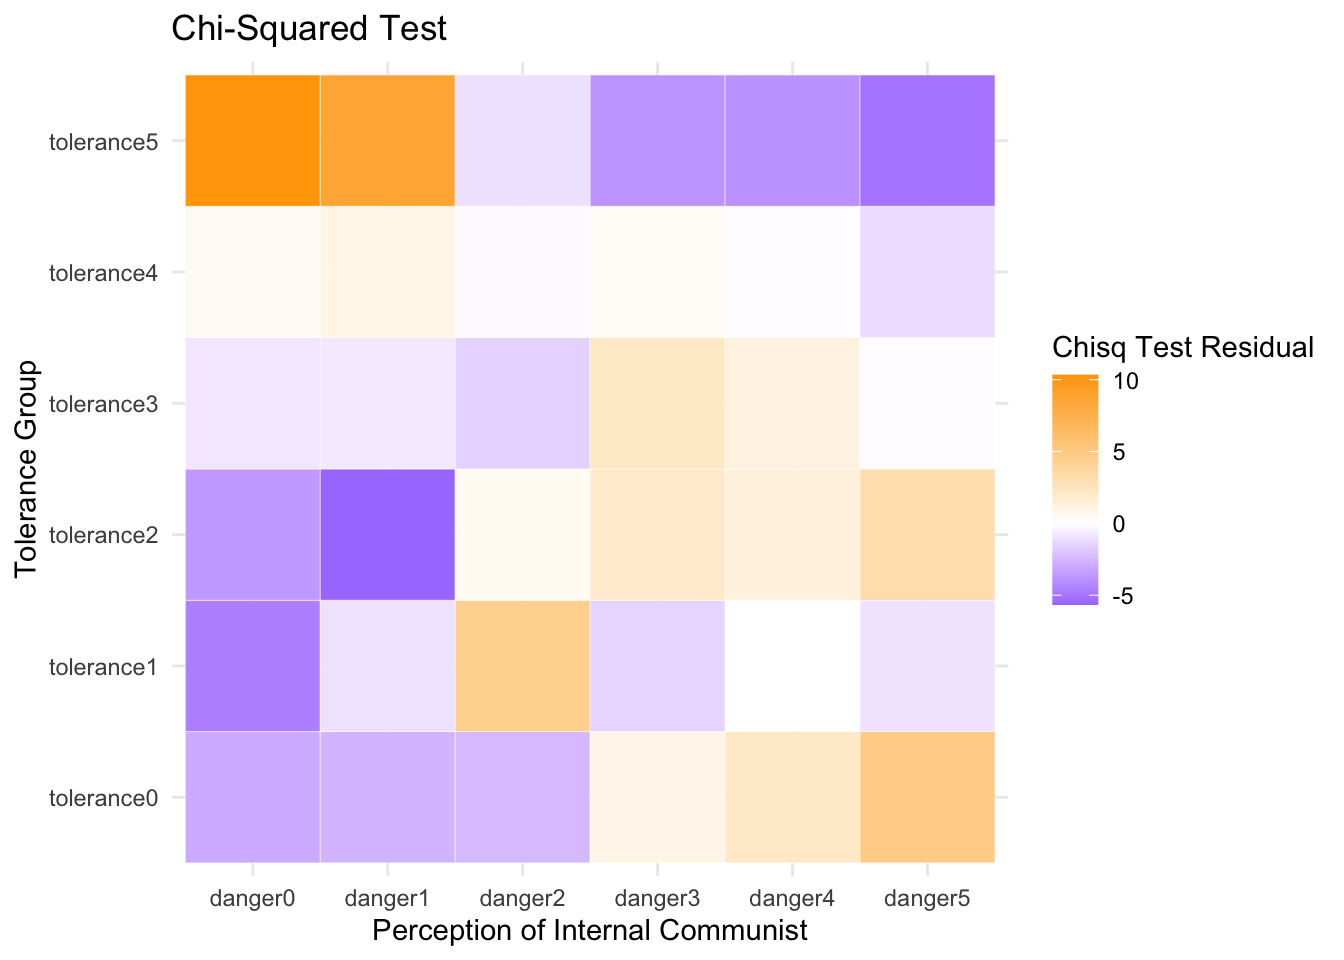

In [ ]:
residuals_df |> ggplot(aes(x = danger, y = tolerance, fill = residual)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "orange", midpoint = 0, limit = c(min(residuals_df$residual), max(residuals_df$residual)), name = "Chisq Test Residual") +
  labs(
    title = "Chi-Squared Test",
    x = "Perception of Internal Communist",
    y = "Tolerance Group"
  ) +
  theme_minimal()

## Results

### Reflections

## Policy Recommendation

Fund For The Republic, and Samuel A. Stouffer. 2020. “Communism, Conformity &Amp; Civil Liberties.” Roper Center for Public Opinion Research. <https://doi.org/10.25940/ROPER-31089514>.

Stouffer, Samuel A. 1992. “Communism, Conformity, and Civil Liberties Study, 1954.” Inter-university Consortium for Political and Social Research. <https://doi.org/10.3886/ICPSR07202.v2>.

Stouffer, Samuel Andrew. 1955. *Communism, Conformity, and Civil Liberties: A Cross-Section of the Nation Speaks Its Mind*. Transaction Publishers.

Tessler, Mark. 2022. *Social Science Research in the Arab World and Beyond: A Guide for Students, Instructors and Researchers*. Springer Nature.